In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
canada = pd.read_csv('/kaggle/input/cnd1234/canada1.csv', delimiter = ';')
canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
3,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
4,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,...,268,295,184,106,76,62,61,39,70,45


In [4]:
canada.columns

Index(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013'],
      dtype='object')

In [5]:
canada = canada.drop(columns = ['AREA', 'DEV', 'DevName', 'REG', 'Type', 'Coverage', 'AreaName', 'RegName'])
canada.head()

,OdName,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,16,39,39,47,71,340,496,741,828,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,1,0,0,0,0,0,1,2,2,...,1450,1223,856,702,560,716,561,539,620,603
2,American Samoa,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,Andorra,0,0,0,0,0,0,2,0,0,...,0,0,1,1,0,0,0,0,1,1
4,Angola,1,3,6,6,4,3,5,5,11,...,268,295,184,106,76,62,61,39,70,45


In [6]:
canada.rename(columns = {'OdName' : 'Country'}, inplace = True)
canada.set_index(canada.Country, inplace = True)
canada.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Afghanistan,16,39,39,47,71,340,496,741,828,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Albania,1,0,0,0,0,0,1,2,2,...,1450,1223,856,702,560,716,561,539,620,603
American Samoa,American Samoa,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Andorra,0,0,0,0,0,0,2,0,0,...,0,0,1,1,0,0,0,0,1,1
Angola,Angola,1,3,6,6,4,3,5,5,11,...,268,295,184,106,76,62,61,39,70,45


In [7]:
canada.index.name = None
canada.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Afghanistan,Afghanistan,16,39,39,47,71,340,496,741,828,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Albania,1,0,0,0,0,0,1,2,2,...,1450,1223,856,702,560,716,561,539,620,603
American Samoa,American Samoa,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Andorra,0,0,0,0,0,0,2,0,0,...,0,0,1,1,0,0,0,0,1,1
Angola,Angola,1,3,6,6,4,3,5,5,11,...,268,295,184,106,76,62,61,39,70,45


In [8]:
del canada['Country']
canada.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1
Angola,1,3,6,6,4,3,5,5,11,6,...,268,295,184,106,76,62,61,39,70,45


In [9]:
canada = canada.transpose()
canada.head()

,Afghanistan,Albania,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe,Unknown
1980,16,1,0,0,1,0,368,0,702,234,...,128,0,0,103,1191,0,1,11,72,44000
1981,39,0,1,0,3,0,426,0,639,238,...,132,0,0,117,1829,0,2,17,114,18078
1982,39,0,0,0,6,0,626,0,484,201,...,146,0,0,174,2162,0,1,11,102,16904
1983,47,0,0,0,6,0,241,0,317,117,...,105,0,0,124,3404,0,6,7,44,13635
1984,71,0,0,0,4,42,237,0,317,127,...,90,0,0,142,7583,0,0,16,32,14855


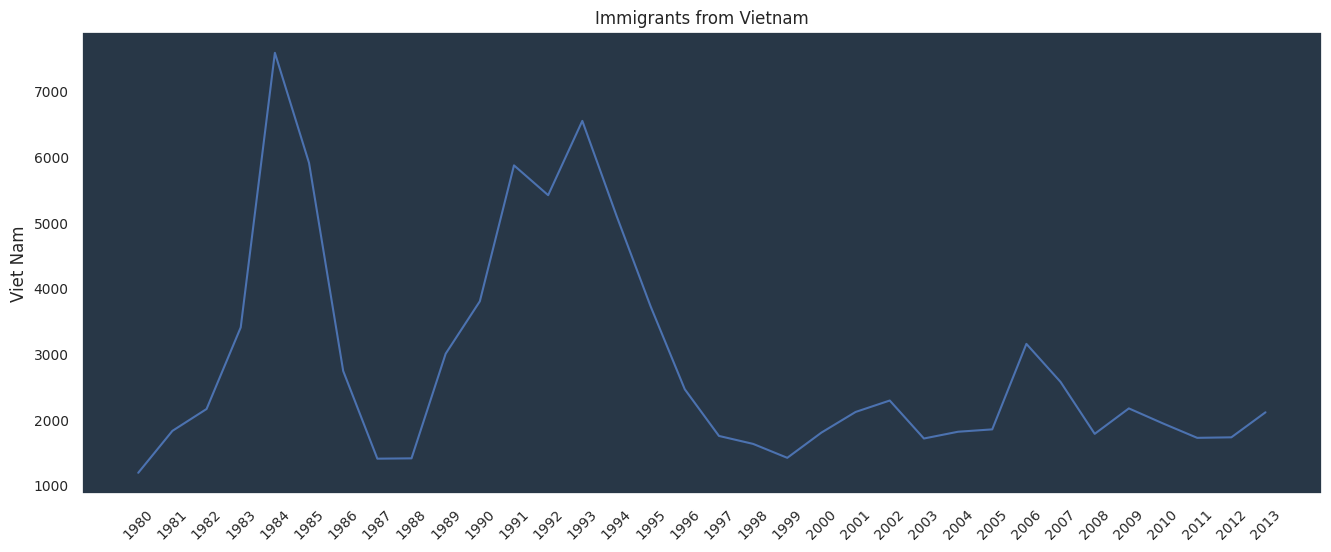

In [11]:
plt.figure(figsize = (16, 6))
plt.title('Immigrants from Vietnam')
sns.set(rc = {'axes.facecolor' : '#283747', 'axes.grid' : False, 'xtick.labelsize' : 10, 'ytick.labelsize' : 10})
plt.xticks(rotation = 45)
sns.lineplot(x = canada.index.values, y = canada['Viet Nam'])
plt.show()

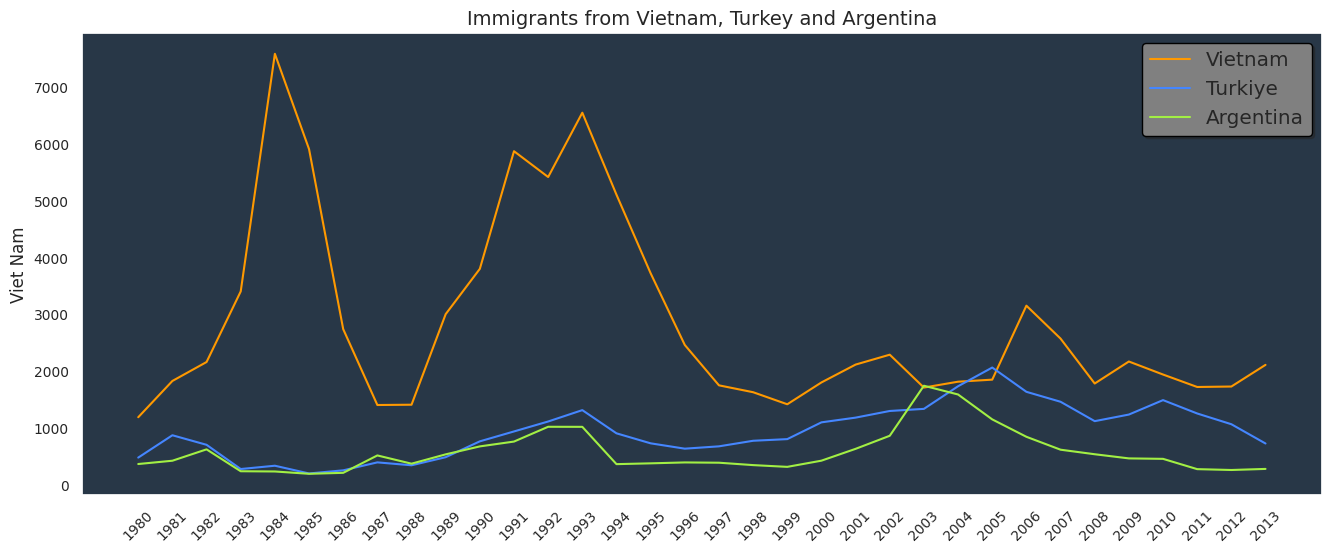

In [12]:
#Multiple Data
plt.figure(figsize = (16, 6))
plt.title('Immigrants from Vietnam, Turkey and Argentina', fontsize = 14)
sns.set(rc = {'axes.facecolor' : '#283747', 'axes.grid' : False, 'xtick.labelsize' : 10, 'ytick.labelsize' : 10})
plt.xticks(rotation = 45)
sns.lineplot(x = canada.index.values, y = canada['Viet Nam'], color = '#ff9900', label = 'Vietnam')
sns.lineplot(x = canada.index.values, y = canada['Turkey'], color = '#4586ff', label = 'Turkiye')
sns.lineplot(x = canada.index.values, y = canada['Argentina'], color = '#a2ef44', label = 'Argentina')
plt.legend(facecolor = 'grey', fontsize = 'large', edgecolor = 'black', shadow = True)
plt.show()

In [13]:
#Mini-ödev: Bütün ülkeleri aynı grafikte görselleştirme

In [14]:
#Scatter Plots
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [15]:
insurance = pd.read_csv('/kaggle/input/insrnce123/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


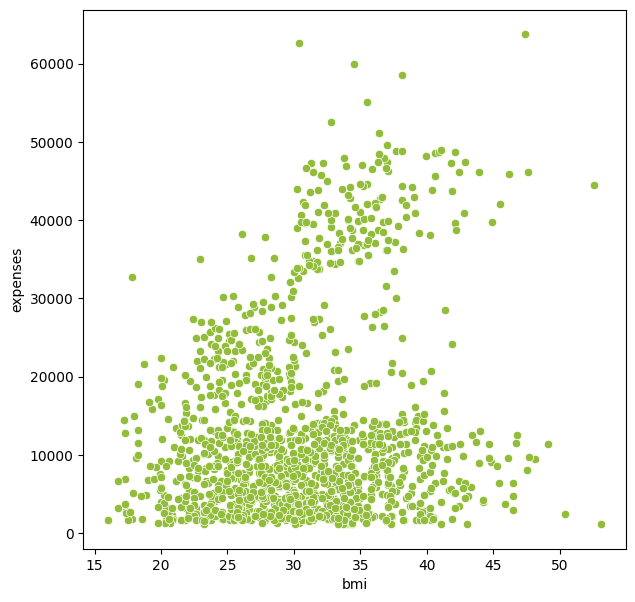

In [17]:
plt.figure(figsize = (7, 7))
sns.scatterplot(x = insurance.bmi, y = insurance.expenses, color = '#91bd3a')
plt.show()

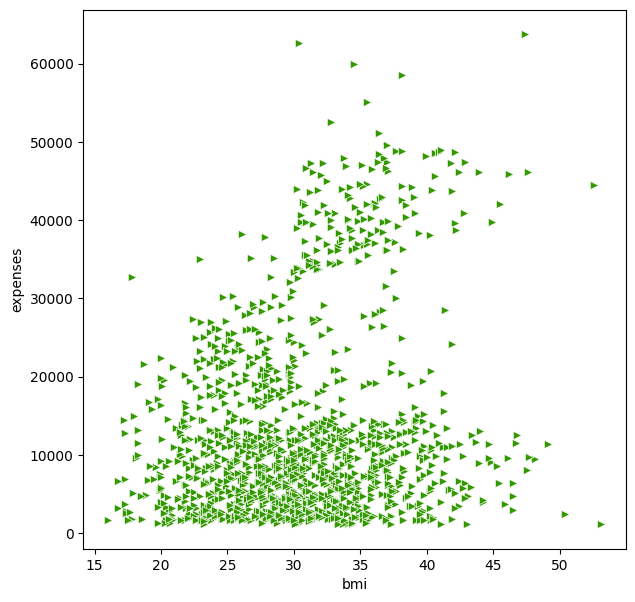

In [18]:
plt.figure(figsize = (7, 7))
sns.scatterplot(x = insurance.bmi, y = insurance.expenses, color = '#339900', marker = '>')
plt.show()

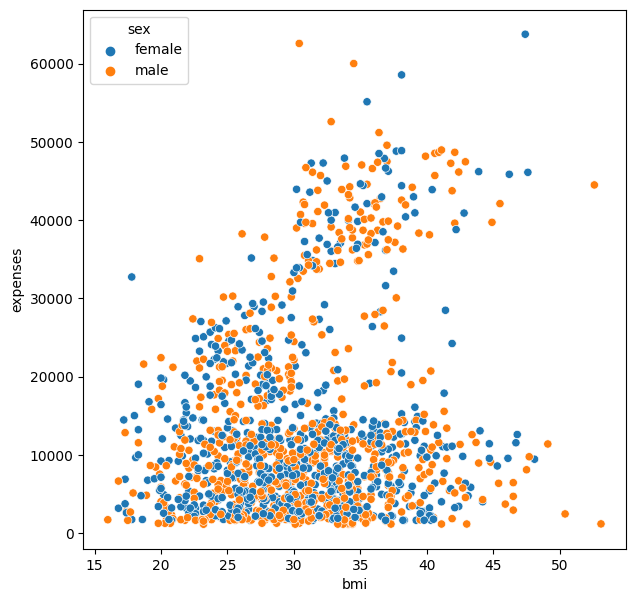

In [19]:
plt.figure(figsize = (7, 7))
sns.scatterplot(x = insurance.bmi, y = insurance.expenses, hue = insurance.sex)
plt.show()

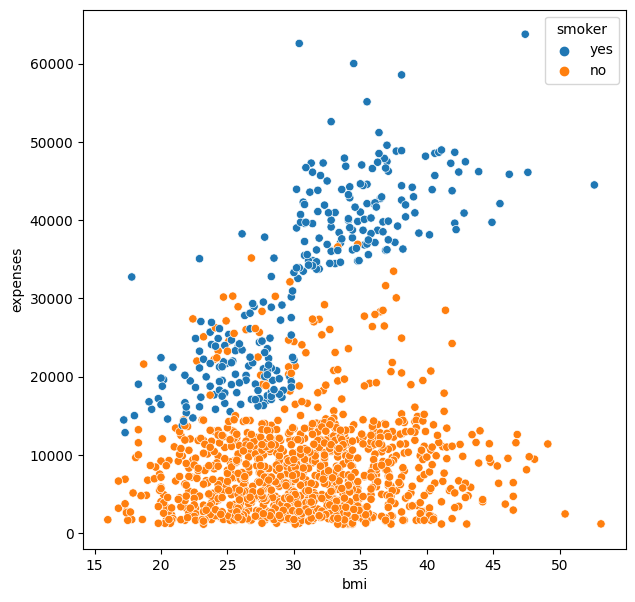

In [20]:
plt.figure(figsize = (7, 7))
sns.scatterplot(x = insurance.bmi, y = insurance.expenses, hue = insurance.smoker)
plt.show()

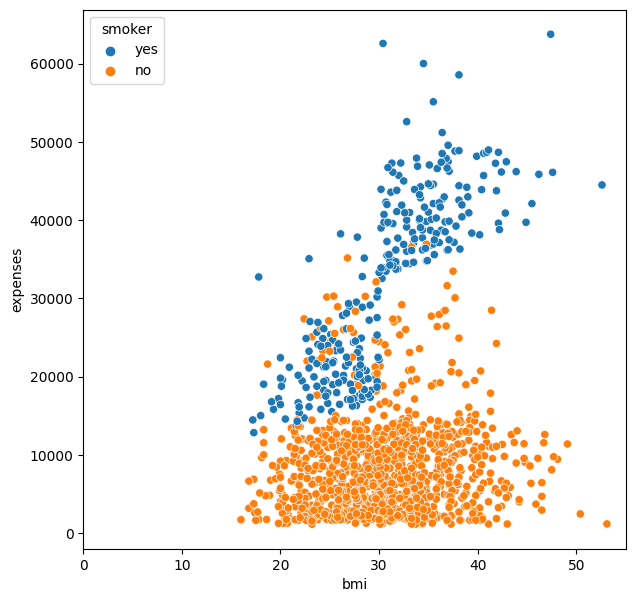

In [21]:
plt.figure(figsize = (7, 7))
plt.xlim([0, 55])
sns.scatterplot(x = insurance.bmi, y = insurance.expenses, hue = insurance.smoker)
plt.show()

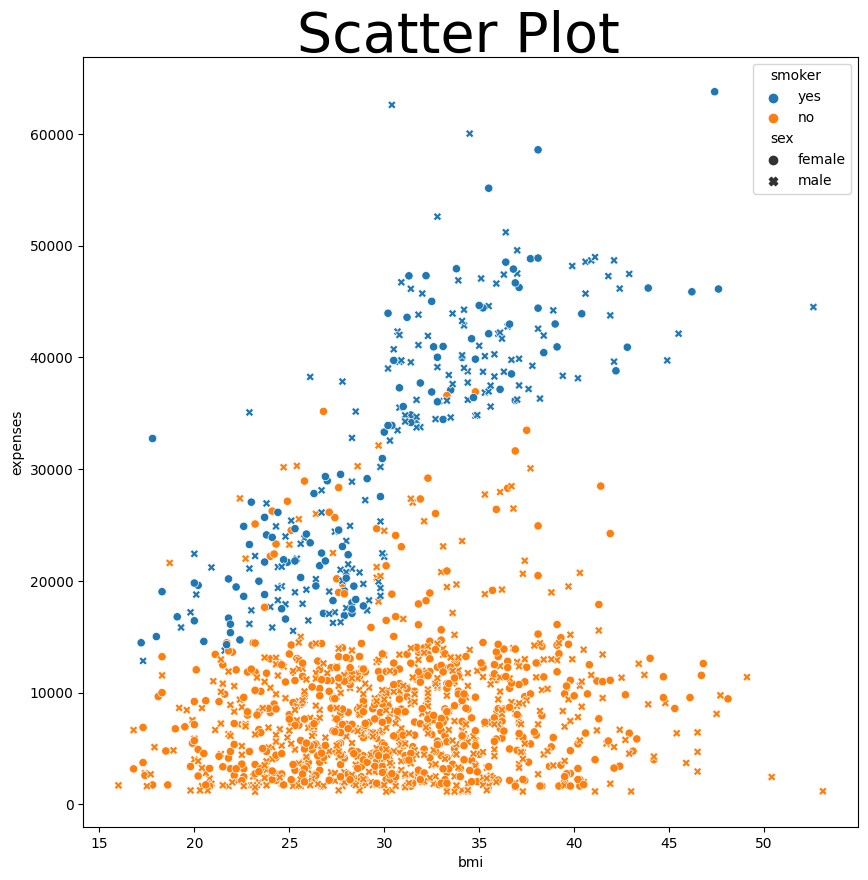

In [22]:
plt.figure(figsize = (10, 10))
plt.gcf().text(.5, .9, "Scatter Plot", fontsize = 40, color = 'Black', ha = 'center', va = 'center')
sns.scatterplot(x = insurance.bmi, y = insurance.expenses, hue = insurance.smoker, style = insurance.sex)
plt.show()

In [23]:
#Relplot
fish = pd.read_csv('/kaggle/input/fish1234/Fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


<Figure size 1400x1600 with 0 Axes>

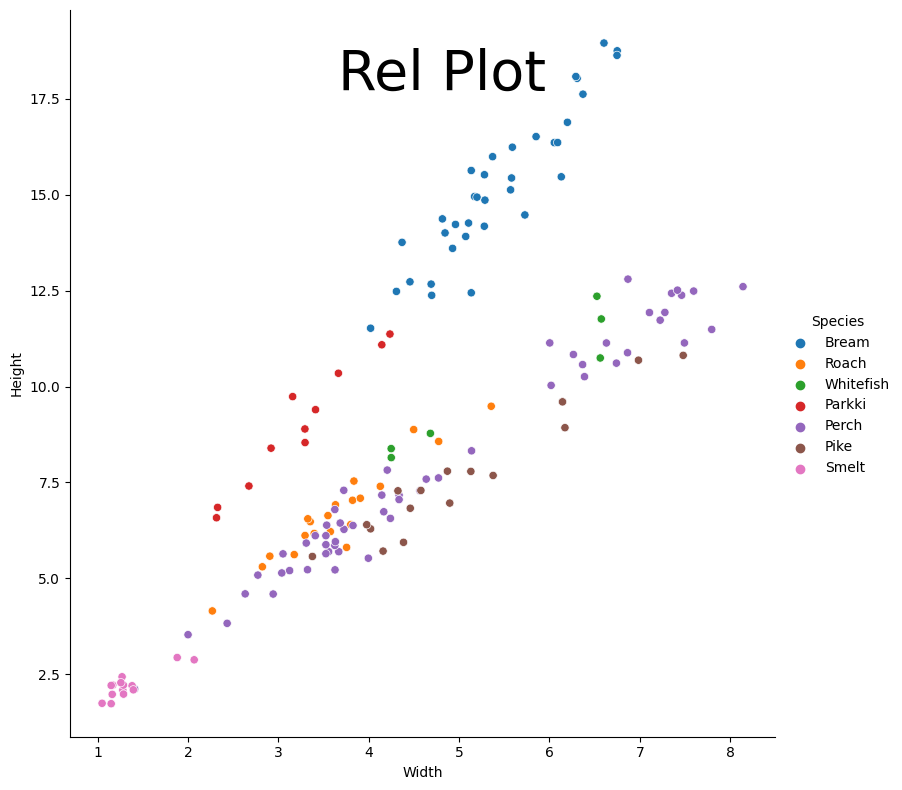

In [25]:
plt.figure(figsize = (14, 16))
sns.relplot(x = 'Width', y = 'Height', hue = 'Species', data = fish, height = 8, aspect = 1)
plt.gcf().text(.5, .9, "Rel Plot", fontsize = 40, color = 'Black', ha = 'center', va = 'center')
plt.show()

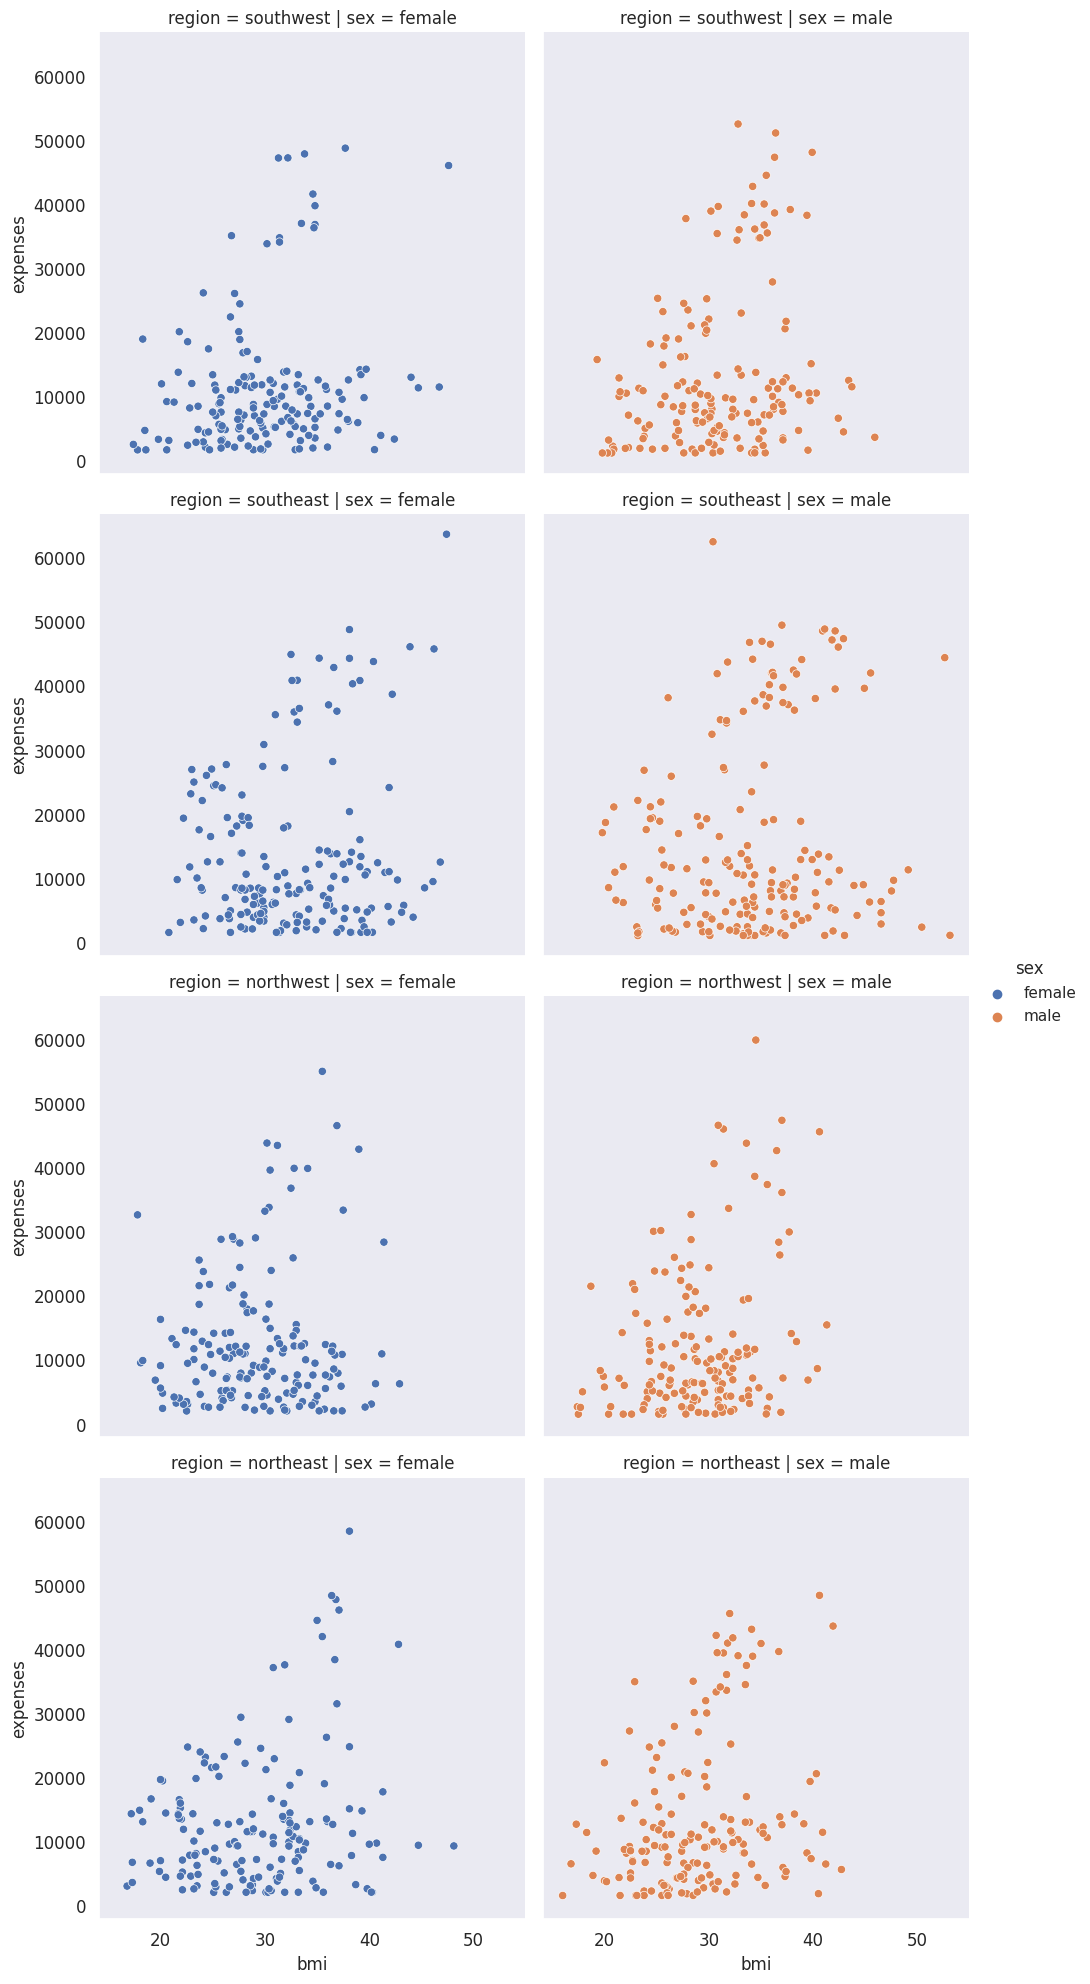

In [26]:
#Multiple Graphs
sns.set(rc = {'xtick.labelsize' : 12, 'ytick.labelsize' : 12, 'axes.labelsize' : 12, 'axes.grid' : False})
sns.relplot(x = 'bmi', y = 'expenses', hue = 'sex', col = 'sex', row = 'region', data = insurance)
plt.show()

In [27]:
#Bar Plot
mpl.rcParams.update(mpl.rcParamsDefault)

In [32]:
pokemon = pd.read_csv('/kaggle/input/pokeupdated1234/poke_updated1.csv')
pokemon.head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,367,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,467,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,607,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,725,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,335,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,447,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,596,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,742,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,716,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,363,44,48,65,50,64,43,1,False


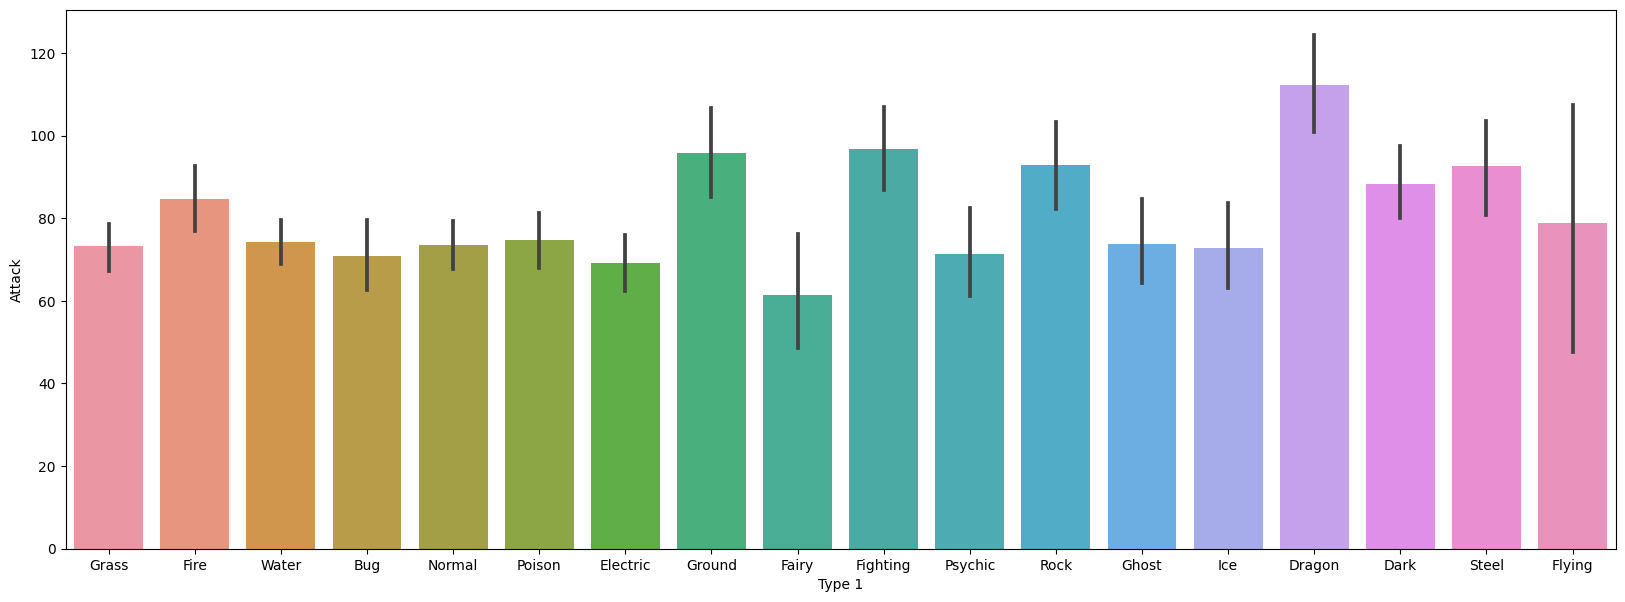

In [29]:
plt.figure(figsize = (20, 7))
sns.barplot(x = pokemon['Type 1'], y = pokemon['Attack'])
plt.show()

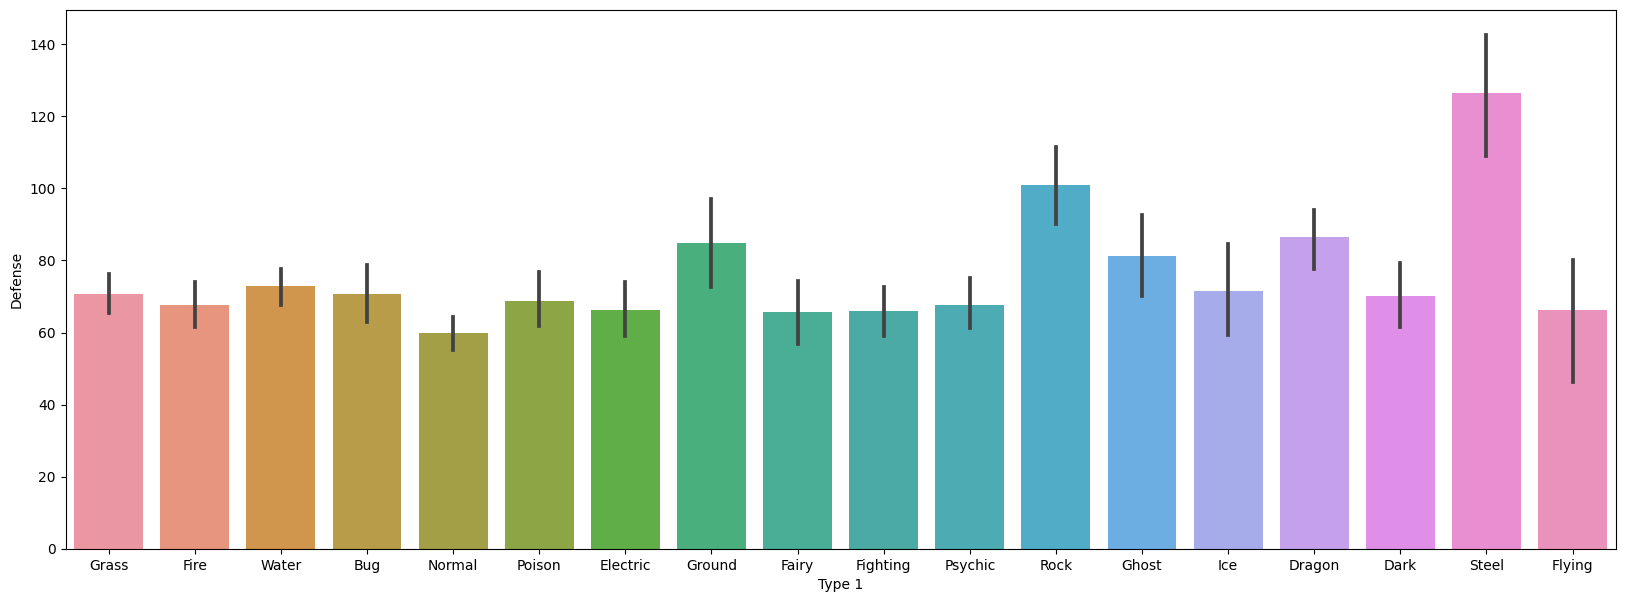

In [33]:
plt.figure(figsize = (20, 7))
sns.barplot(x = pokemon['Type 1'], y = pokemon['Defense'])
plt.show()

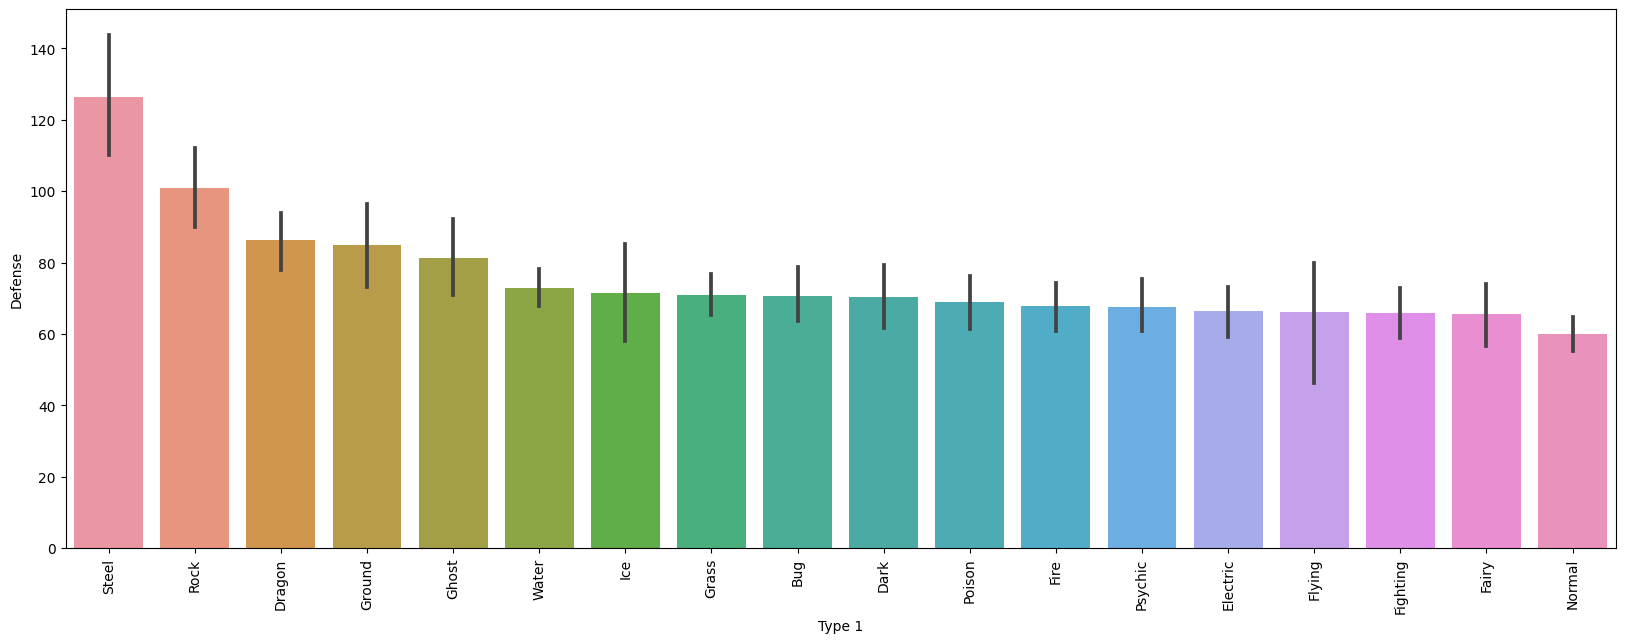

In [40]:
#Büyükten küçüğe sıralama
plt.figure(figsize = (20, 7))
order = pokemon.groupby('Type 1')['Defense'].mean().sort_values(ascending = False).index
sns.barplot(x = pokemon['Type 1'], y = pokemon['Defense'], order = order)
plt.xticks(rotation = 90)
plt.show()

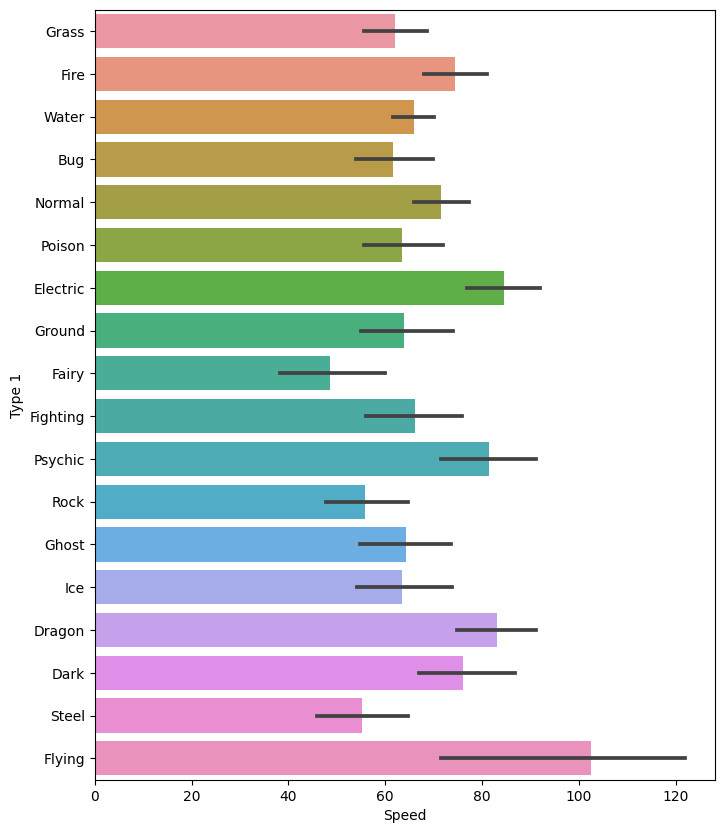

In [41]:
#Horizontal (Yatay) versiyon
plt.figure(figsize = (8, 10))
sns.barplot(x = pokemon['Speed'], y = pokemon['Type 1'])
plt.show()

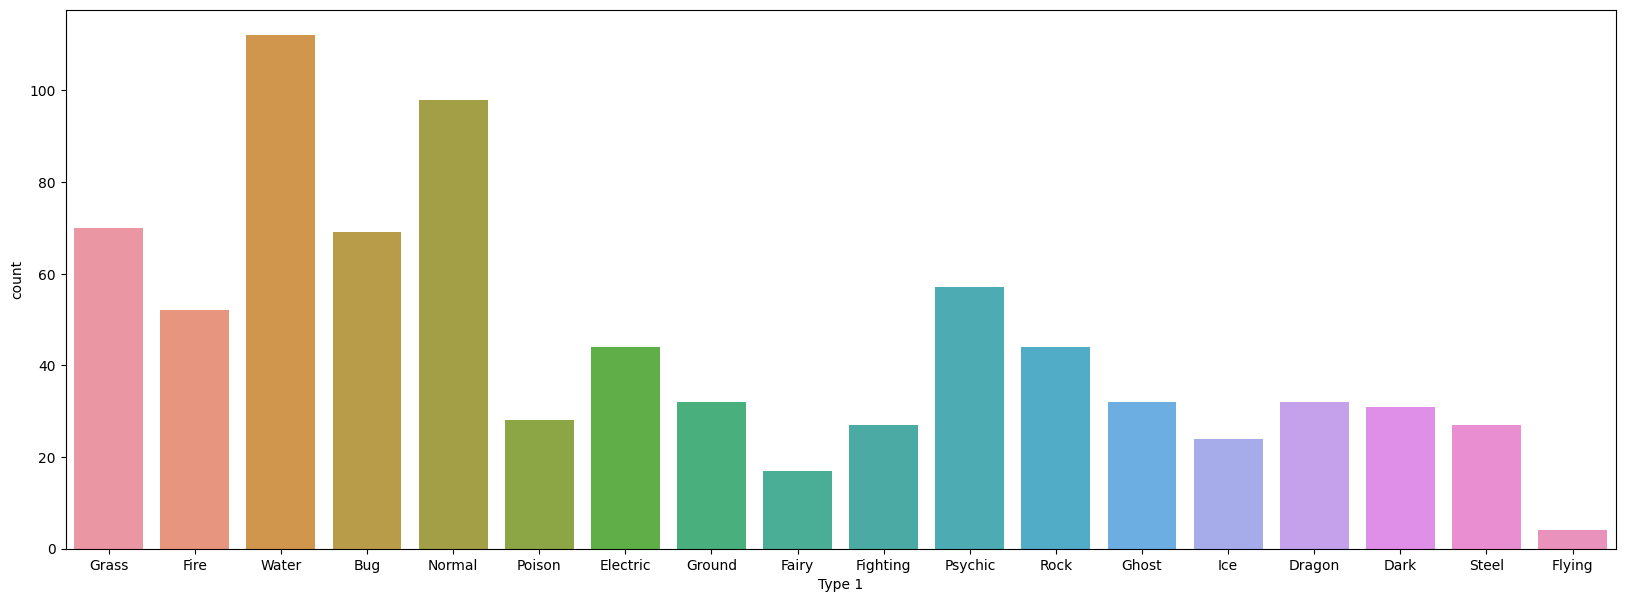

In [42]:
#countplot
plt.figure(figsize = (20, 7))
sns.countplot(x = pokemon['Type 1'])
plt.show()

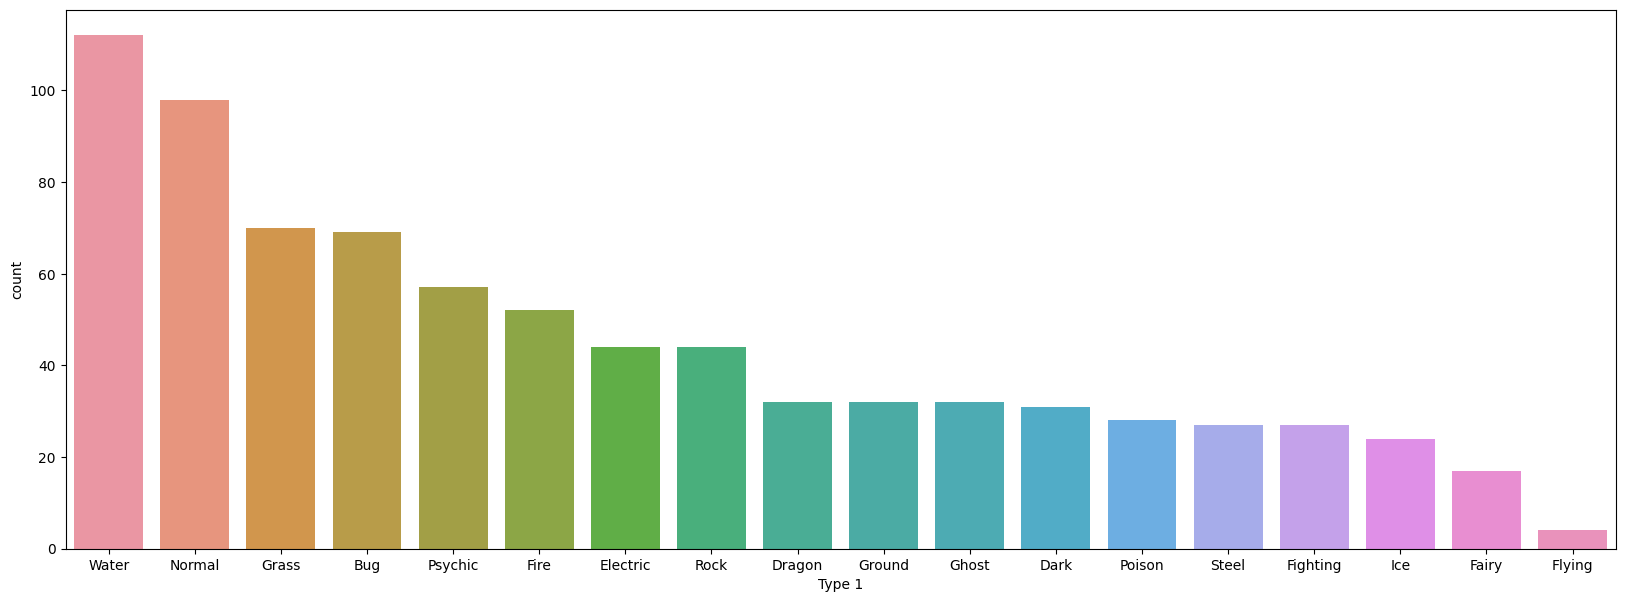

In [43]:
#Sıralama
plt.figure(figsize = (20, 7))
sns.countplot(x = pokemon['Type 1'], order = pokemon['Type 1'].value_counts().index)
plt.show()